In [1]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

D:\python\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Platform: Windows-10-10.0.16299-SP0
Tensorflow version: 1.4.0
Keras version: 2.1.2


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import plot_model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

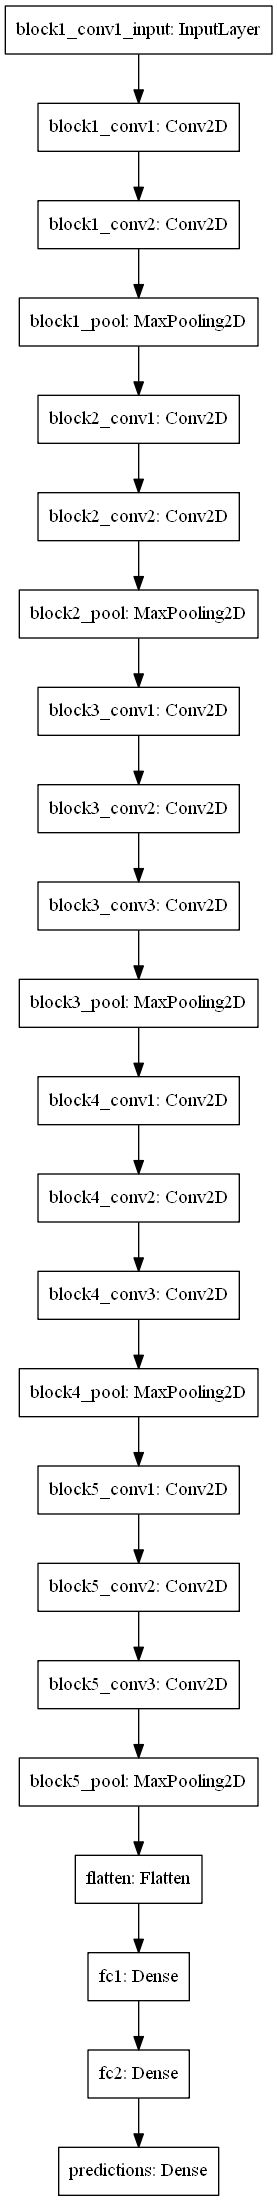

In [6]:
#Sequential模型
input_shape=(224,224,3)

model = Sequential(name='vgg16_sequential')

# 第1個卷積區塊 (block1)
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape, name='block1_conv1'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block1_pool'))

# 第2個卷積區塊 (block2)
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block2_pool'))

# 第3個卷積區塊 (block3)
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block3_pool'))

# 第4個卷積區塊 (block4)
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block4_pool'))

# 第5個卷積區塊 (block5)
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block5_pool'))

# 前饋全連接區塊
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dense(1000, activation='softmax', name='predictions'))

# 打印網絡結構
model.summary()
plot_model(model,to_file='vgg16.png')
Image('vgg16.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

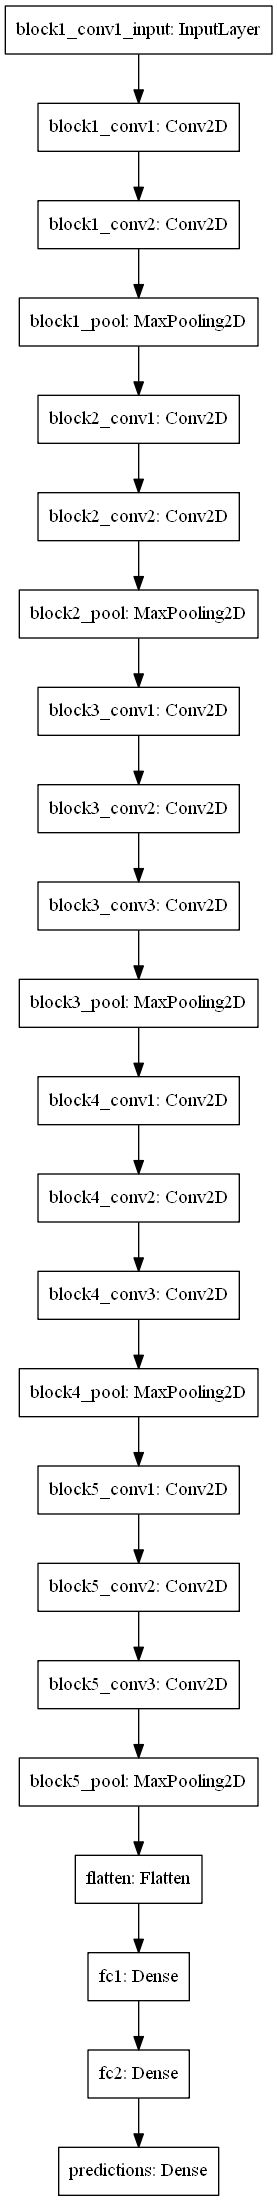

In [7]:
#functional 模型
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

# 定義輸入
input_shape = (224, 224, 3) # RGB影像224x224 (height, width, channel)

# 輸入層
img_input = Input(shape=input_shape, name='img_input')

# 第1個卷積區塊 (block1)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# 第2個卷積區塊 (block2)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# 第3個卷積區塊 (block3)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# 第4個卷積區塊 (block4)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# 第5個卷積區塊 (block5)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# 前饋全連接區塊
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(1000, activation='softmax', name='predictions')(x)

# 產生模型
model2 = Model(inputs=img_input, outputs=x, name='vgg16-funcapi')

# 打印網絡結構
model2.summary()
plot_model(model2,'vgg16-func.png')
Image('vgg16.png')